<a href="https://colab.research.google.com/github/benamaranermine/predict-live-birth-occurrence-before-in-vitro-fertilization-treatment/blob/main/test_pretrainedmodels(gaia).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') # filter the warnings

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV

import pandas as pd
import numpy as np
from numpy import genfromtxt
import csv
from sklearn import model_selection
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
from sklearn.feature_selection import RFECV,SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR, SVC, LinearSVC
from google.colab import drive



In [2]:
drive.mount('/content/drive')


Mounted at /content/drive


In [69]:

file_path = '/content/drive/MyDrive/CasosFIV_Gaia_reduced.xlsx'
data = pd.read_excel(file_path)


In [ ]:
data

,Live birth occurrence,Egg source,Patient age at treatment,Causes of infertility - tubal disease,Total number of previous live births - IVF or DI,Total number of previous pregnancies - IVF and DI,Causes of infertility - endometriosis,Causes of infertility - ovulatory disorder,Total number of previous IVF cycles,Total number of previous DI cycles,Sperm source,Partner age
0,1,1,32,0,0,0,0,0,0,0,1,32.000000
1,1,1,35,0,0,1,0,0,3,1,1,44.000000
2,1,1,31,0,0,0,0,0,0,2,0,37.314607
3,1,0,35,0,1,1,0,1,1,0,1,38.000000
4,1,1,36,0,0,0,0,0,0,0,0,37.314607
...,...,...,...,...,...,...,...,...,...,...,...,...
106,0,1,41,0,0,1,0,0,3,0,1,40.000000
107,0,1,43,0,2,3,0,0,0,0,1,42.000000
108,0,0,44,0,3,3,0,0,0,0,1,37.314607
109,0,1,20,0,0,0,0,1,0,0,1,23.000000


Exploratory Data Analysis


As data scientists, we usually use the words EDA and Data Visualization interchangeably. However, EDA is an approach to data analysis that uses a variety of techniques, and one of them is Data Visualization (also called Graphical EDA).

Before Visualizing (Non-Graphical EDA)

In [ ]:
data.shape

(111, 12)

In [ ]:
for col in data:
    print(f"{col} has : {data[col].unique()} unique values\n")

Live birth occurrence has : [1 0 2] unique values

Egg source has : [1 0] unique values

Patient age at treatment has : [32 35 31 36 29 39 34 27 33 30 38 44 43 40 41 45 51 50 46 42 28 37 23 26
 20] unique values

Causes of infertility - tubal disease has : [0 1] unique values

Total number of previous live births - IVF or DI has : [0 1 2 3] unique values

Total number of previous pregnancies - IVF and DI has : [0 1 2 3 5 4] unique values

Causes of infertility - endometriosis has : [0 1] unique values

Causes of infertility - ovulatory disorder has : [0 1] unique values

Total number of previous IVF cycles has : [0 3 1 2 4] unique values

Total number of previous DI cycles has : [0 1 2 3 4] unique values

Sperm source has : [1 0] unique values

Partner age has : [32.         44.         37.31460674 38.         35.         36.
 30.         33.         37.         50.         42.         40.
 49.         43.         46.         34.         29.         31.
 59.         45.         41.    

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 12 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Live birth occurrence                              111 non-null    int64  
 1   Egg source                                         111 non-null    int64  
 2   Patient age at treatment                           111 non-null    int64  
 3   Causes of infertility - tubal disease              111 non-null    int64  
 4   Total number of previous live births - IVF or DI   111 non-null    int64  
 5   Total number of previous pregnancies - IVF and DI  111 non-null    int64  
 6   Causes of infertility - endometriosis              111 non-null    int64  
 7   Causes of infertility - ovulatory disorder         111 non-null    int64  
 8   Total number of previous IVF cycles                111 non-null    int64  
 9   Total numb

In [ ]:
data.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Live birth occurrence,111.0,0.441441,0.582856,0.0,0.0,0.000000,1.0,2.0
Egg source,111.0,0.783784,0.413530,0.0,1.0,1.000000,1.0,1.0
Patient age at treatment,111.0,35.369369,5.900582,20.0,30.0,35.000000,40.0,51.0
Causes of infertility - tubal disease,111.0,0.027027,0.162898,0.0,0.0,0.000000,0.0,1.0
Total number of previous live births - IVF or DI,111.0,0.324324,0.689692,0.0,0.0,0.000000,0.0,3.0
Total number of previous pregnancies - IVF and DI,111.0,0.585586,1.171390,0.0,0.0,0.000000,1.0,5.0
Causes of infertility - endometriosis,111.0,0.072072,0.259780,0.0,0.0,0.000000,0.0,1.0
Causes of infertility - ovulatory disorder,111.0,0.081081,0.274198,0.0,0.0,0.000000,0.0,1.0
Total number of previous IVF cycles,111.0,0.486486,0.882814,0.0,0.0,0.000000,1.0,4.0
Total number of previous DI cycles,111.0,0.378378,0.924948,0.0,0.0,0.000000,0.0,4.0


In [ ]:
data.isnull().sum()


Live birth occurrence                                0
Egg source                                           0
Patient age at treatment                             0
Causes of infertility - tubal disease                0
Total number of previous live births - IVF or DI     0
Total number of previous pregnancies - IVF and DI    0
Causes of infertility - endometriosis                0
Causes of infertility - ovulatory disorder           0
Total number of previous IVF cycles                  0
Total number of previous DI cycles                   0
Sperm source                                         0
Partner age                                          0
dtype: int64

Graphical EDA

1-covert age ranges into categorical data


*  Patient age at treatment
*  Partner age



In [70]:


# Assuming you have already read the Excel file into a DataFrame called 'data'
# Replace 'data' with the actual variable name if different

# Custom function to map float values to categorical values based on age ranges
def map_age_range(age):
    if 18 <= age <= 34:
        return 0
    elif 35 <= age <= 37.5:
        return 1
    elif 38 <= age <= 39:
        return 2
    elif 40 <= age <= 42:
        return 3
    elif 43 <= age <= 44:
        return 4
    elif 45 <= age <= 50:
        return 5
    elif 50 <= age <= 65:
        return 6
    else:
        return None  # Handle any other cases as per your requirement

# Apply the custom mapping function to the 'Patient Age at Treatment' column
data['Patient age at treatment'] = data['Patient age at treatment'].map(map_age_range)

# Verify the changes
print(data['Patient age at treatment'])


0      0
1      1
2      0
3      1
4      1
      ..
106    3
107    4
108    4
109    0
110    3
Name: Patient age at treatment, Length: 111, dtype: int64


In [ ]:
#data=data.drop(['Partner age'], axis=1)

In [71]:
# Apply the custom mapping function to the 'Patient Age at Treatment' column
data['Partner age'] = data['Partner age'].map(map_age_range).astype('Int64')

# Verify the changes
print(data['Partner age'])


0      0
1      4
2      1
3      2
4      1
      ..
106    3
107    3
108    1
109    0
110    3
Name: Partner age, Length: 111, dtype: Int64


In [72]:
def convert_to_binary_classification(df):
    # Copy the original DataFrame
    data = df.copy()


    # Set values greater than 1 to 1, and the rest to 0
    data["Live birth occurrence"] = data["Live birth occurrence"].apply(lambda x: 1 if x >= 1 else 0)


    return data


# Assume `df` is your original DataFrame


# Convert the "Live-birth Occurrence" column to binary classification
data = convert_to_binary_classification(data)


# Display the result
print(data["Live birth occurrence"])





0      1
1      1
2      1
3      1
4      1
      ..
106    0
107    0
108    0
109    0
110    0
Name: Live birth occurrence, Length: 111, dtype: int64


2- Graphical EDA
Univariate analysis is simply the analysis of one variable at a time.


*   For categorical features, we want to know the number of unique classes and how frequently they occur.

*   For numerical features, we want to know the range of values present and how often these values (or groups of values) occur.




In [ ]:
data.isnull().sum()


Live birth occurrence                                0
Egg source                                           0
Patient age at treatment                             0
Causes of infertility - tubal disease                0
Total number of previous live births - IVF or DI     0
Total number of previous pregnancies - IVF and DI    0
Causes of infertility - endometriosis                0
Causes of infertility - ovulatory disorder           0
Total number of previous IVF cycles                  0
Total number of previous DI cycles                   0
Sperm source                                         0
Partner age                                          0
dtype: int64

<Figure size 1000x800 with 0 Axes>

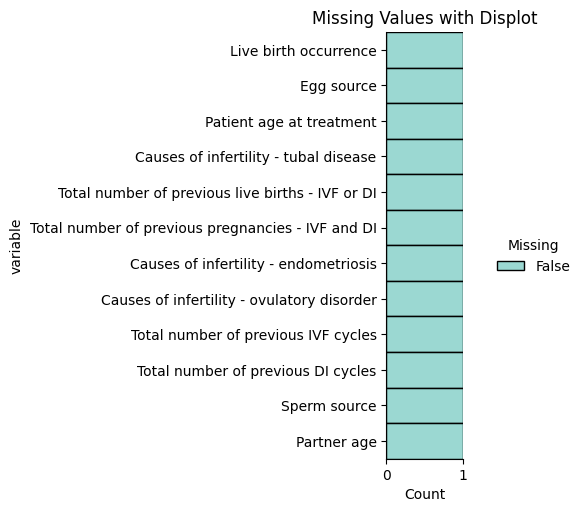

In [ ]:
plt.figure(figsize=(10,8))
sns.displot(
    data=data.isna().melt(value_name="Missing"),
    y="variable",
    hue="Missing",
    multiple="fill",
    palette = "GnBu"
)
plt.title('Missing Values with Displot')
plt.show()

Now let's look at unique values in data columns

In [73]:
data['Partner age'] = data['Partner age'].astype('int')


In [74]:
for col in data:
    print(f"{col} has : {data[col].unique()} unique values\n")

Live birth occurrence has : [1 0] unique values

Egg source has : [1 0] unique values

Patient age at treatment has : [0 1 2 4 3 5 6] unique values

Causes of infertility - tubal disease has : [0 1] unique values

Total number of previous live births - IVF or DI has : [0 1 2 3] unique values

Total number of previous pregnancies - IVF and DI has : [0 1 2 3 5 4] unique values

Causes of infertility - endometriosis has : [0 1] unique values

Causes of infertility - ovulatory disorder has : [0 1] unique values

Total number of previous IVF cycles has : [0 3 1 2 4] unique values

Total number of previous DI cycles has : [0 1 2 3 4] unique values

Sperm source has : [1 0] unique values

Partner age has : [0 4 1 2 5 3 6] unique values



# Count Plot

Target variable :Live birth occurrence

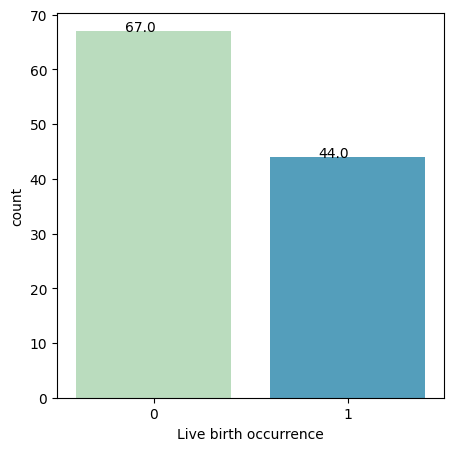

In [59]:
plt.figure(figsize=(5, 5))
ax = sns.countplot(x = data['Live birth occurrence'], palette="GnBu")
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

In [ ]:
# The classes are heavily skewed we need to solve this issue later.
print('No Live birth occurrence', round(data['Live birth occurrence'].value_counts()[0]/len(data) * 100,2), '% of the dataset')
print('Live birth occurrence', round(data['Live birth occurrence'].value_counts()[1]/len(data) * 100,2), '% of the dataset')

No Live birth occurrence 60.36 % of the dataset
Live birth occurrence 39.64 % of the dataset


we can see that we have unbalanced data

# corrolation

<Axes: >

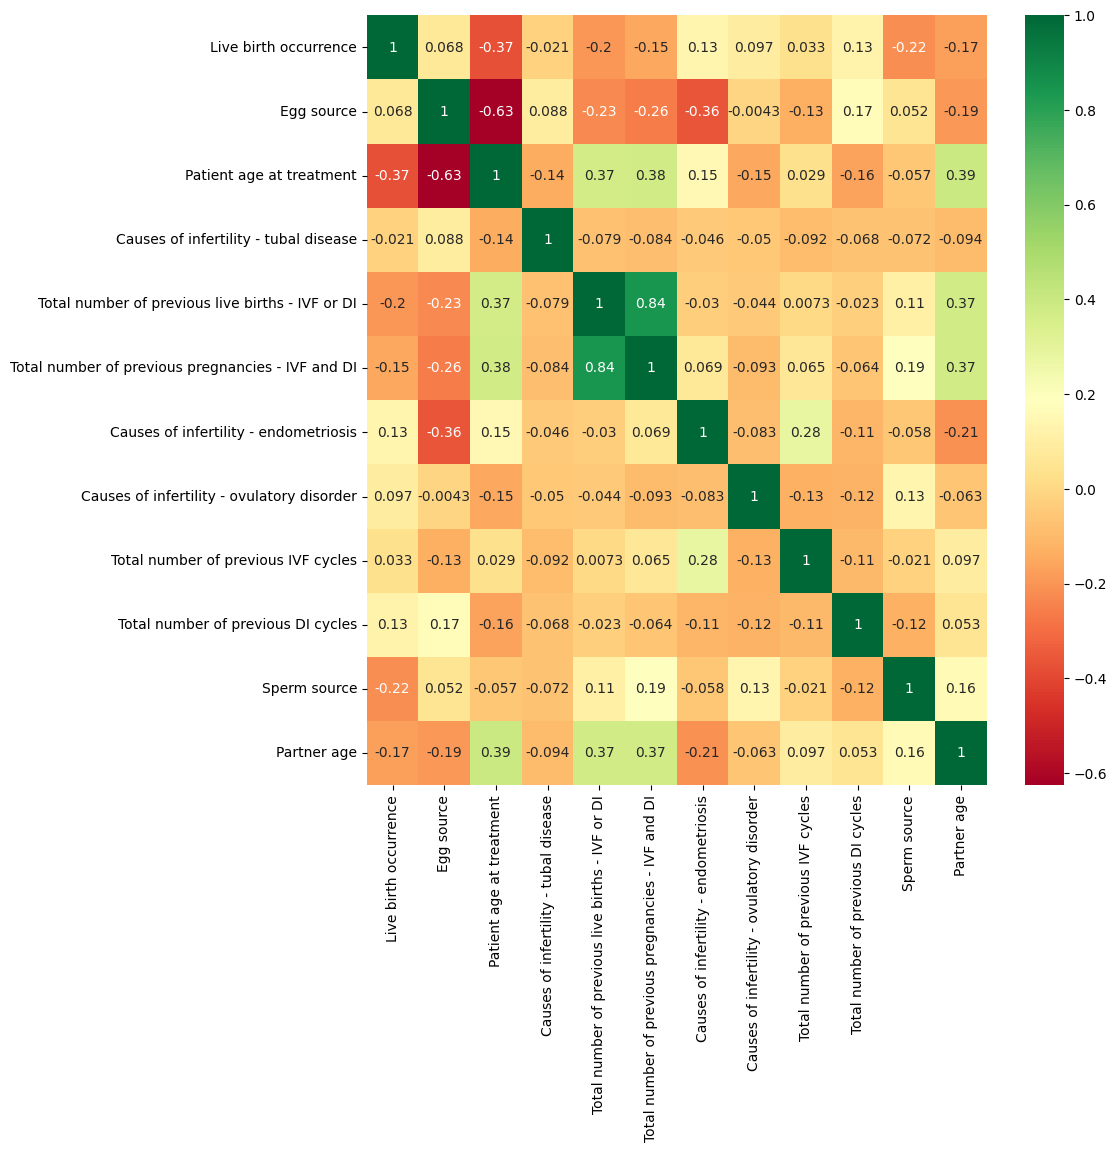

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(method='pearson'),cbar=True,cmap='RdYlGn',annot=True)

In [ ]:
# Most predominante variable
#Lets you know which variables have the most influence on Live birth occurrence
numeric_data = data.select_dtypes(exclude="object")
numeric_corr = numeric_data.corr()
Num_feature = numeric_corr["Live birth occurrence"].sort_values(ascending=False).head(22).to_frame()
z = Num_feature.drop(["Live birth occurrence"])
cm = sns.light_palette("#5F9EA0", as_cmap=True)
style = z.style.background_gradient(cmap=cm)
style

,Live birth occurrence
Causes of infertility - endometriosis,0.130247
Total number of previous DI cycles,0.127043
Causes of infertility - ovulatory disorder,0.096652
Egg source,0.067714
Total number of previous IVF cycles,0.033418
Causes of infertility - tubal disease,-0.021487
Total number of previous pregnancies - IVF and DI,-0.154243
Partner age,-0.170449
Total number of previous live births - IVF or DI,-0.195028
Sperm source,-0.218498


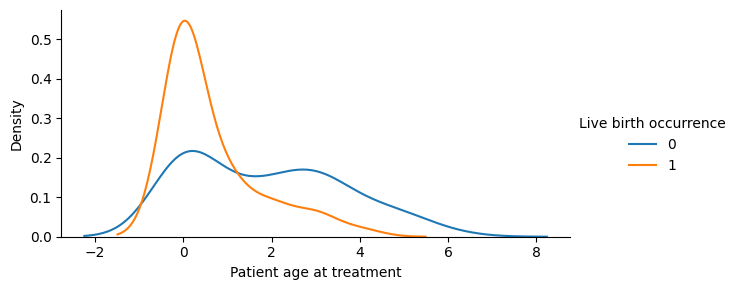

In [ ]:
grid=sns.FacetGrid(data,hue='Live birth occurrence',aspect=2)
grid.map(sns.kdeplot,'Patient age at treatment')
grid.add_legend()

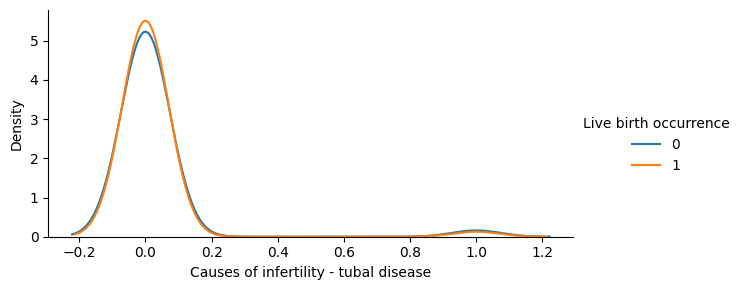

In [ ]:
grid=sns.FacetGrid(data,hue='Live birth occurrence',aspect=2)
grid.map(sns.kdeplot,'Causes of infertility - tubal disease')
grid.add_legend()

#Data Balancing

In [79]:
X = data.drop(['Live birth occurrence'], axis=1)


In [80]:
Y = data['Live birth occurrence']


In [82]:
from sklearn.preprocessing import StandardScaler

# Select the columns from the DataFrame
cols = X.columns

# Initialize the scaler
scaler = StandardScaler()

# Scale the features
scaled_features = scaler.fit_transform(X)

# Create new DataFrames for scaled features
X = pd.DataFrame(scaled_features, columns=cols)


In [83]:
X

,Egg source,Patient age at treatment,Causes of infertility - tubal disease,Total number of previous live births - IVF or DI,Total number of previous pregnancies - IVF and DI,Causes of infertility - endometriosis,Causes of infertility - ovulatory disorder,Total number of previous IVF cycles,Total number of previous DI cycles,Sperm source,Partner age
0,0.502331,-0.742516,-0.15133,-0.441741,-0.472016,-0.268328,-0.268328,-0.520579,-0.432556,0.490653,-0.980294
1,0.502331,-0.096431,-0.15133,-0.441741,0.444653,-0.268328,-0.268328,2.967301,0.661076,0.490653,1.686901
2,0.502331,-0.742516,-0.15133,-0.441741,-0.472016,-0.268328,-0.268328,-0.520579,1.754707,-2.038099,-0.313495
3,-1.990719,-0.096431,-0.15133,1.115977,0.444653,-0.268328,3.726780,0.642048,-0.432556,0.490653,0.353304
4,0.502331,-0.096431,-0.15133,-0.441741,-0.472016,-0.268328,-0.268328,-0.520579,-0.432556,-2.038099,-0.313495
...,...,...,...,...,...,...,...,...,...,...,...
129,0.502331,-0.742516,-0.15133,-0.441741,-0.472016,-0.268328,-0.268328,-0.520579,-0.432556,0.490653,-0.980294
130,0.502331,-0.742516,-0.15133,-0.441741,-0.472016,-0.268328,-0.268328,1.804675,-0.432556,0.490653,1.020103
131,0.502331,-0.742516,-0.15133,-0.441741,-0.472016,-0.268328,-0.268328,-0.520579,-0.432556,0.490653,-0.980294
132,0.502331,-0.742516,-0.15133,-0.441741,-0.472016,-0.268328,-0.268328,-0.520579,-0.432556,-2.038099,-0.313495


In [84]:
# Import libraries
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import pandas as pd

# Create logistic regression
logreg = LogisticRegression()

# Fit model
logreg.fit(X, Y)

# Get coefficients
coeffs = logreg.coef_[0]

# Zip features and coefficients
coef_dict = dict(zip(list(X.columns), coeffs))

# Print coefficients
print('Feature coefficients:')
for feat, coef in coef_dict.items():
    print(feat, ':', coef)

# Print intercept
print('Intercept:', logreg.intercept_)

# Evaluate model
y_preds = logreg.predict(X)
print('Accuracy:', metrics.accuracy_score(Y, y_preds))

Feature coefficients:
Egg source : -0.618598435845635
Patient age at treatment : -1.830313770717018
Causes of infertility - tubal disease : -0.2746868440828474
Total number of previous live births - IVF or DI : -0.5118790831587512
Total number of previous pregnancies - IVF and DI : 0.23825016913033706
Causes of infertility - endometriosis : 0.3595999094966952
Causes of infertility - ovulatory disorder : 0.016448924793514764
Total number of previous IVF cycles : -0.12932652203281947
Total number of previous DI cycles : 0.02728490333717946
Sperm source : -0.7169932508682191
Partner age : 0.2511340322591473
Intercept: [-0.14655928]
Accuracy: 0.7686567164179104




*   Patient age at treatment has a large negative coefficient (-1.50), indicating older age significantly decreases the probability of a successful outcome (live birth I presume). This is likely the most influential feature.
*  Egg source also has a negative coefficient (-0.47). Certain egg sources are associated with lower success probability. Important factor.
*  Tubal disease as cause of infertility reduces success chance (-0.20 coefficient). Endometriosis increases it (+0.40 coef).
*  More previous IVF cycles decreases success probability slightly (-0.03 coef). Previous DI cycles increases it a bit (+0.14 coef).
*   Sperm source has a moderate negative effect (-0.66 coef). Some sources lead to lower success rates
*   Partner age has a small positive coefficient (+0.23). Older partners may improve outcomes.
*   The model predicts the outcome correctly around 71% of the time based on the accuracy.

In summary, patient age, egg source, cause of infertility and sperm source seem to be the most impactful factors on probability of success.



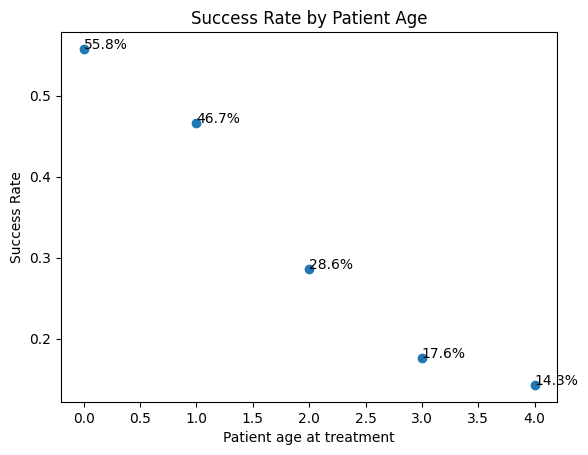

In [85]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
# Filter to only successful live births
success_data = data[data['Live birth occurrence'] == 1]

# Calculate success rate
success_by_age = success_data.groupby('Patient age at treatment')['Live birth occurrence'].count() / data.groupby('Patient age at treatment')['Live birth occurrence'].count()

# Plot age vs success rate
plt.scatter(success_by_age.index, success_by_age)

# Annotate each point with percentage
for i, txt in enumerate(np.round(success_by_age*100,1)):
    plt.annotate(str(txt)+'%', (success_by_age.index[i], success_by_age[i]))

plt.title('Success Rate by Patient Age')
plt.xlabel('Patient age at treatment')
plt.ylabel('Success Rate')

# Trendline

plt.show()

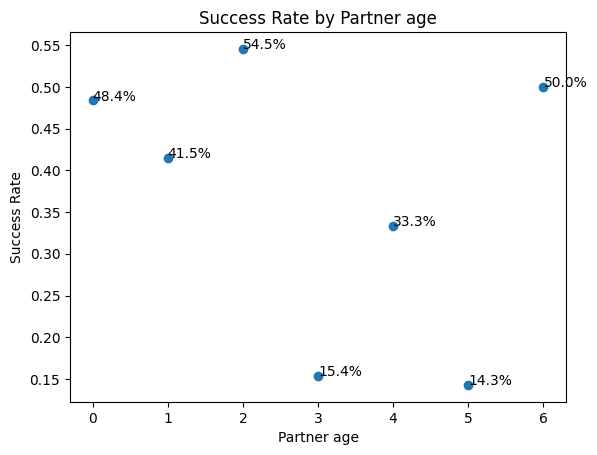

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
# Filter to only successful live births
success_data = data[data['Live birth occurrence'] == 1]

# Calculate success rate
success_by_age = success_data.groupby('Partner age')['Live birth occurrence'].count() / data.groupby('Partner age')['Live birth occurrence'].count()

# Plot age vs success rate
plt.scatter(success_by_age.index, success_by_age)

# Annotate each point with percentage
for i, txt in enumerate(np.round(success_by_age*100,1)):
    plt.annotate(str(txt)+'%', (success_by_age.index[i], success_by_age[i]))

plt.title('Success Rate by Partner age')
plt.xlabel('Partner age')
plt.ylabel('Success Rate')

# Trendline

plt.show()

In [67]:
# List of columns (excluding 'Patient age at treatment' and 'Live birth occurrence')
probability_columns = [
    'Patient age at treatment',
    'Egg source',
    'Causes of infertility - tubal disease',
    'Total number of previous live births - IVF or DI',
    'Total number of previous pregnancies - IVF and DI',
    'Causes of infertility - endometriosis',
    'Causes of infertility - ovulatory disorder',
    'Total number of previous IVF cycles',
    'Total number of previous DI cycles',
    'Sperm source',
    'Partner age'
]

# Calculate the probability of live birth occurrence (success=1) for each column
for col in probability_columns:
    success_probabilities = data[data['Live birth occurrence'] == 1].groupby(col).size()
    total_occurrences = data.groupby(col).size()
    live_birth_occurrence_probability = (success_probabilities / total_occurrences) * 100

    print(f"Probability of live birth occurrence (success=1) based on {col}:")
    print(live_birth_occurrence_probability)
    print("\n")

Probability of live birth occurrence (success=1) based on Patient age at treatment:
Patient age at treatment
0    55.769231
1    46.666667
2    28.571429
3    17.647059
4    14.285714
5          NaN
6          NaN
dtype: float64


Probability of live birth occurrence (success=1) based on Egg source:
Egg source
0    33.333333
1    41.379310
dtype: float64


Probability of live birth occurrence (success=1) based on Causes of infertility - tubal disease:
Causes of infertility - tubal disease
0    39.814815
1    33.333333
dtype: float64


Probability of live birth occurrence (success=1) based on Total number of previous live births - IVF or DI:
Total number of previous live births - IVF or DI
0    43.678161
1    35.714286
2    12.500000
3          NaN
dtype: float64


Probability of live birth occurrence (success=1) based on Total number of previous pregnancies - IVF and DI:
Total number of previous pregnancies - IVF and DI
0    41.975309
1    41.666667
2    50.000000
3    16.666667
4     

In [87]:
# split the dataset
SEED=23
X_new_train, X_new_test, y_new_train, Y_new_test = train_test_split(X, Y, test_size=0.3,shuffle=True, stratify=Y, random_state=SEED)
#With random_state=0 , we get the same train and test sets across different executions


#Random Forest

In [88]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(n_estimators=25, random_state=12)
clf_rf.fit(X_new_train,y_new_train)

RandomForestClassifier(n_estimators=25, random_state=12)

In [89]:
from sklearn.metrics import classification_report

print(classification_report(Y_new_test, clf_rf.predict(X_new_test)))


              precision    recall  f1-score   support

           0       0.65      0.75      0.70        20
           1       0.72      0.62      0.67        21

    accuracy                           0.68        41
   macro avg       0.69      0.68      0.68        41
weighted avg       0.69      0.68      0.68        41



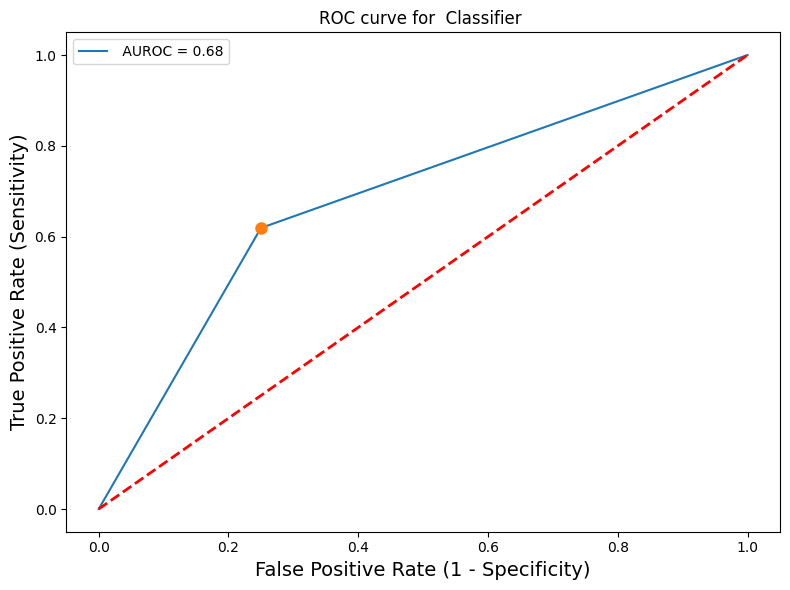

In [90]:
from sklearn.metrics import roc_curve, auc

fig, (ax2) = plt.subplots(figsize = (8,6))
        #roc-curve
fpr, tpr, thresholds_roc = roc_curve(Y_new_test, clf_rf.predict(X_new_test))
roc_auc = auc(fpr,tpr)
ax2.plot(fpr,tpr, label = " AUROC = {:0.2f}".format(roc_auc))
ax2.plot([0,1], [0,1], 'r', linestyle = "--", lw = 2)
ax2.set_xlabel("False Positive Rate", fontsize = 14)
ax2.set_ylabel("True Positive Rate", fontsize = 14)
ax2.set_title("ROC Curve", fontsize = 18)
ax2.legend(loc = 'best')
plt.title('ROC curve for  Classifier ')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
        #find default threshold
close_default = np.argmin(np.abs(thresholds_roc - 0.5))
ax2.plot(fpr[close_default], tpr[close_default], 'o', markersize = 8)
plt.tight_layout()

In [ ]:
#y_pred = clf_rf.predict(loaded_data)
#y_pred

#Pretrained Model

In [91]:
from keras.models import load_model

# Load the saved model
pretrained_model = load_model('/content/drive/MyDrive/my_model3.h5')


In [92]:
from keras.models import Model
from keras.layers import Input, Dense
import tensorflow as tf


In [93]:
num_classes = 2


In [94]:
from tensorflow.keras.layers import Input, Dense, concatenate
from tensorflow.keras.models import Model

# Assuming you have a pretrained_model defined here
# pretrained_model = ... (pretrained model loaded here)

# Freeze the initial layers of the pretrained model
for layer in pretrained_model.layers:
    layer.trainable = False

new_input_shape = (11,)  # Change this to the desired input shape
new_input = Input(shape=new_input_shape)
new_layers = Dense(32, activation='relu', name='new_dense')(new_input)  # Change the number of units

# Connect the new input layer to a dense layer with the desired number of units
adapted_hidden_layer = Dense(64, activation='relu', name='adapted_dense')(new_layers)

# Connect the adapted hidden layer to the pretrained model's output layer
pretrained_output = pretrained_model.layers[-1](adapted_hidden_layer)

# Concatenate the pretrained output with the new layers
merged = concatenate([pretrained_output, new_layers])

# Add an additional Dense layer
new_layers_2 = Dense(128, activation='relu', name='new_dense_2')(merged)

# Add another Dense layer
new_layers_3 = Dense(64, activation='relu', name='new_dense_3')(new_layers_2)

# Add a final prediction layer
num_classes = 2  # Number of classes in your classification problem
output = Dense(num_classes, activation='softmax', name='final_output')(new_layers_3)

# Create the new model with the combined architecture
new_model = Model(inputs=[new_input], outputs=[output])


In [95]:
from keras.utils import to_categorical

# Assuming your original target data is y_new_train

num_classes = 2  # Number of classes in your classification problem
y_new_train_encoded = to_categorical(y_new_train, num_classes)
y_new_test_encoded = to_categorical(Y_new_test, num_classes)

new_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [96]:
new_model.fit(X_new_train, y_new_train_encoded, epochs=10, batch_size=32, validation_data=(X_new_test, y_new_test_encoded))


Epoch 1/10
3/3 [==============================] - 1s 119ms/step - loss: 0.6570 - accuracy: 0.6237 - val_loss: 0.6827 - val_accuracy: 0.5854
Epoch 2/10
3/3 [==============================] - 0s 24ms/step - loss: 0.6138 - accuracy: 0.7204 - val_loss: 0.6833 - val_accuracy: 0.6098
Epoch 3/10
3/3 [==============================] - 0s 15ms/step - loss: 0.5838 - accuracy: 0.7527 - val_loss: 0.6847 - val_accuracy: 0.6341
Epoch 4/10
3/3 [==============================] - 0s 17ms/step - loss: 0.5650 - accuracy: 0.7419 - val_loss: 0.6912 - val_accuracy: 0.6341
Epoch 5/10
3/3 [==============================] - 0s 16ms/step - loss: 0.5495 - accuracy: 0.7527 - val_loss: 0.6991 - val_accuracy: 0.6341
Epoch 6/10
3/3 [==============================] - 0s 24ms/step - loss: 0.5384 - accuracy: 0.7527 - val_loss: 0.7046 - val_accuracy: 0.6341
Epoch 7/10
3/3 [==============================] - 0s 16ms/step - loss: 0.5243 - accuracy: 0.7634 - val_loss: 0.7121 - val_accuracy: 0.6585
Epoch 8/10
3/3 [==========

In [28]:
# Step 6: Evaluate the model
loss, accuracy = new_model.evaluate(X_new_test, y_new_test_encoded)
print('Validation loss:', loss)
print('Validation accuracy:', accuracy)

2/2 [==============================] - 0s 7ms/step - loss: 0.6027 - accuracy: 0.6765
Validation loss: 0.6027057766914368
Validation accuracy: 0.6764705777168274


In [29]:
from sklearn.metrics import roc_auc_score

# Assuming you have predictions and true labels for the validation set
y_pred = new_model.predict(X_new_test)
auc = roc_auc_score(y_new_test_encoded, y_pred)

print("AUC:", auc)

2/2 [==============================] - 0s 4ms/step
AUC: 0.6886446886446888


In [30]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import precision_score

# Assuming you have predictions and true labels for the validation set
y_pred = new_model.predict(X_new_test)
y_pred_binary = np.round(y_pred).astype(int)  # Convert predicted probabilities to binary labels

precision = precision_score(y_new_test_encoded, y_pred_binary, average='micro')
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_new_test_encoded, y_pred_binary, average='micro')
print("Recall:", recall)

# Calculate F1-score
f1 = f1_score(y_new_test_encoded, y_pred_binary, average='micro')
print("F1-score:", f1)

2/2 [==============================] - 0s 7ms/step
Precision: 0.6764705882352942
Recall: 0.6764705882352942
F1-score: 0.6764705882352942


In [ ]:
#loaded_data = pd.read_csv('/content/drive/MyDrive/selected_data.csv')

#loaded_data

In [ ]:
#y_pred = new_model.predict(loaded_data)
#y_pred_binary = np.round(y_pred).astype(int)
#y_pred_binary

In [ ]:
#loaded_Y = pd.read_csv('/content/drive/MyDrive/Y_data.csv')

#loaded_Y

In [ ]:
#y_encoded = to_categorical(loaded_Y, 2)
#y_encoded